In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('arecanut_price.csv')

# Ensure 'Price Date' is in datetime format
data['Price Date'] = pd.to_datetime(data['Price Date'], errors='coerce')

# Sort the data by date
data = data.sort_values(by='Price Date')

# Set 'Price Date' as the index for time series analysis
data.set_index('Price Date', inplace=True)

# Display the first few rows
print(data.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_16136\3888923612.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Price Date'] = pd.to_datetime(data['Price Date'], errors='coerce')


           Variety  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
Price Date                                                             
2002-04-05   Chali                     2889                     3809   
2002-04-05    Cqca                     2409                     2819   
2002-04-08     EDI                     6810                     8299   
2002-04-08  Saraku                     9289                    11201   
2002-04-08    Cqca                     2299                     2899   

            Modal Price (Rs./Quintal)  
Price Date                             
2002-04-05                       3749  
2002-04-05                       2629  
2002-04-08                       7610  
2002-04-08                      10590  
2002-04-08                       2699  


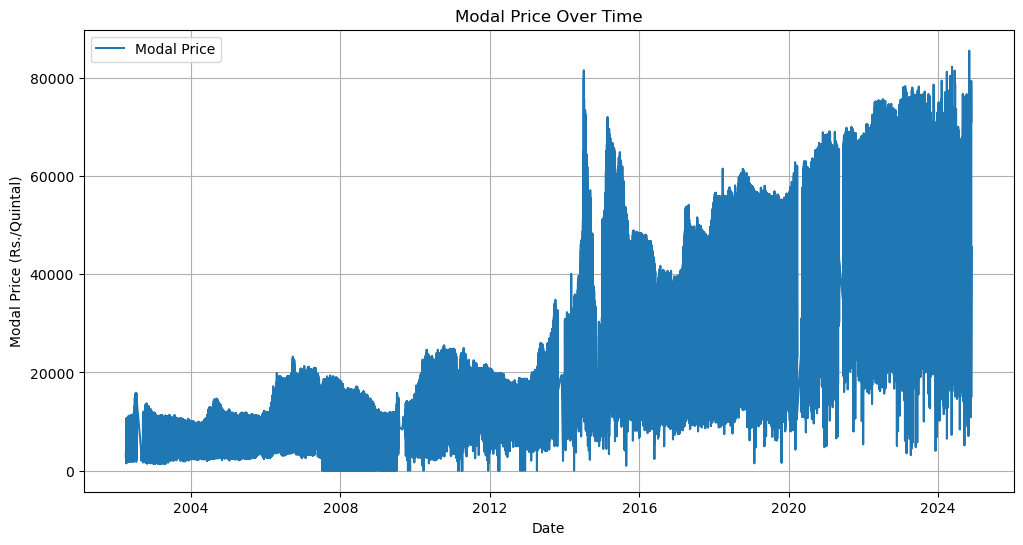

In [5]:
import matplotlib.pyplot as plt

# Plot the Modal Price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Modal Price (Rs./Quintal)'], label='Modal Price')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price Over Time')
plt.legend()
plt.grid()
plt.show()


In [6]:
# Check for missing values
print(data.isnull().sum())

# Optionally fill missing modal prices with interpolation
data['Modal Price (Rs./Quintal)'] = data['Modal Price (Rs./Quintal)'].interpolate()


Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
dtype: int64


In [7]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anac

Mean Squared Error: 191120573.74582016


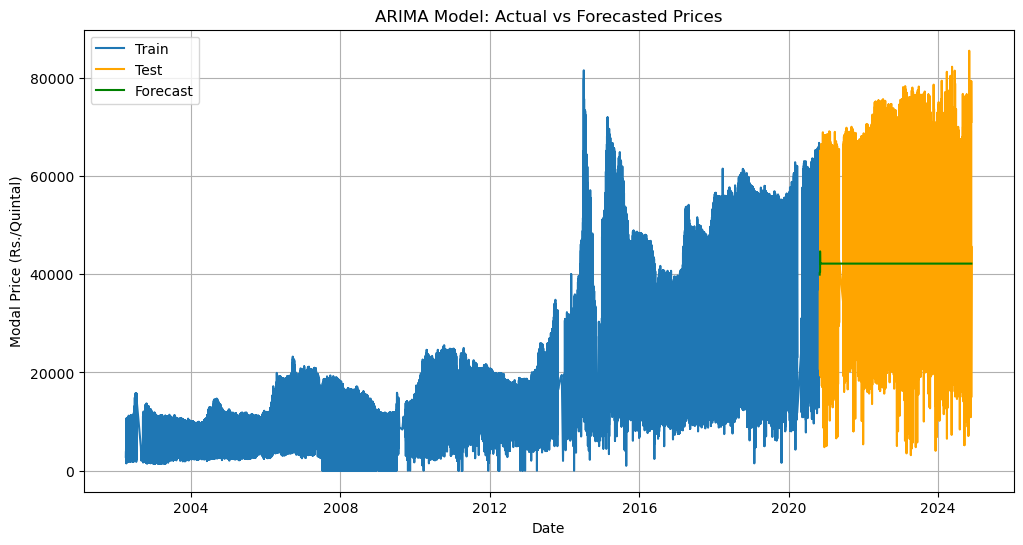

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Select the target variable (Modal Price)
prices = data['Modal Price (Rs./Quintal)']

# Split data into training and testing sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # order=(p, d, q)
arima_model = model.fit()

# Forecast future prices
forecast = arima_model.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('ARIMA Model: Actual vs Forecasted Prices')
plt.legend()
plt.grid()
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


            Date  Forecasted Price (Rs./Quintal)
38136 2025-01-01                    39920.253111
38137 2025-02-01                    40312.144558
38138 2025-03-01                    40408.054861
38139 2025-04-01                    40797.111706
38140 2025-05-01                    42398.408494
38141 2025-06-01                    44653.898939
38142 2025-07-01                    41472.347965
38143 2025-08-01                    41729.363574
38144 2025-09-01                    41911.938527
38145 2025-10-01                    42150.860850
38146 2025-11-01                    42360.596885
38147 2025-12-01                    42379.085333


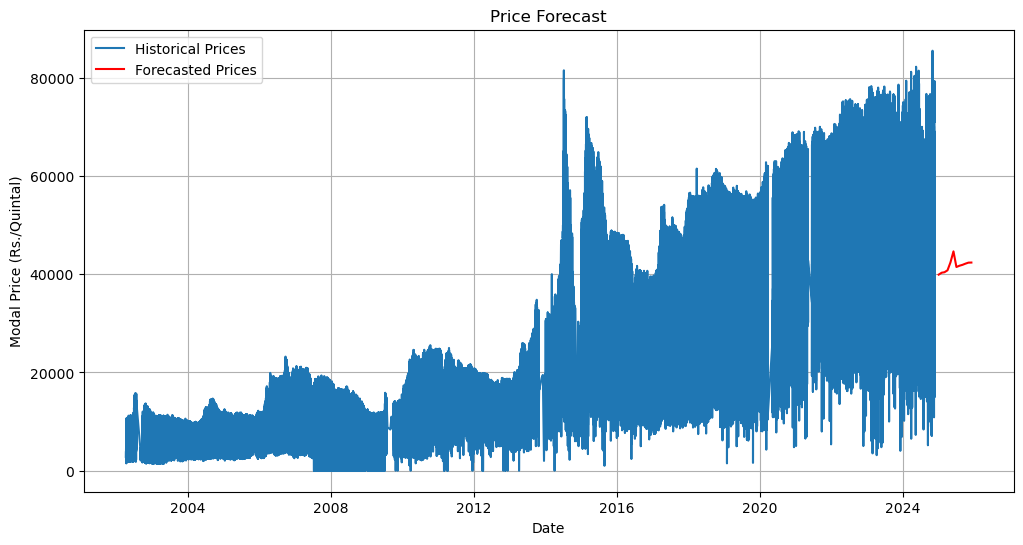

In [9]:
# Predict prices for the next 12 months (or any future period)
future_steps = 12  # Number of months to predict
future_forecast = arima_model.forecast(steps=future_steps)

# Create a date range for the future forecast
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='MS')[1:]

# Create a DataFrame for the forecasted prices
future_prices = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Price (Rs./Quintal)': future_forecast
})

print(future_prices)

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Modal Price (Rs./Quintal)'], label='Historical Prices')
plt.plot(future_prices['Date'], future_prices['Forecasted Price (Rs./Quintal)'], label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Price Forecast')
plt.legend()
plt.grid()
plt.show()


In [11]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


ValueError: Length of values (98886) does not match length of index (19068)

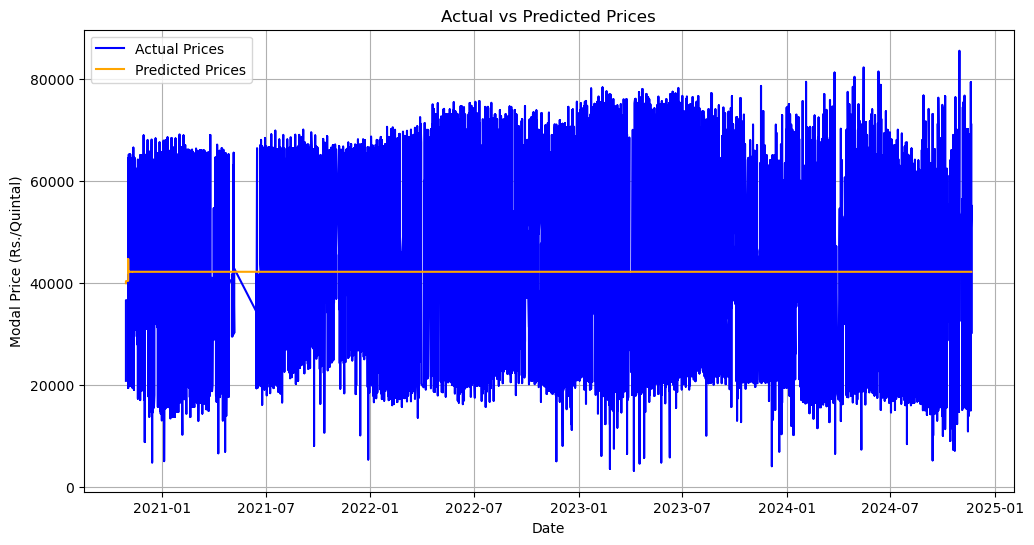

In [12]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='Predicted Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()
